<a href="https://colab.research.google.com/github/aksasaji/LuminarProjects/blob/main/nestleprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nestle India -Historical Stock Price Data**
NESTLE INDIA Historical Stock Price Data For Linear Regression

# **About Dataset** 
This data is downloaded from the official Bombay Stock Exchange Website (BSE).
This file contains the last 10 years of Historical Stock Price (By Security & Period)

Security Name - Nestle India Ltd.

This Data contains 13 columns with no null values.
12 Features and 1 Label / Target Column.


**Load Libraries**

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

**Load Data**

In [53]:
df=pd.read_csv('/content/drive/MyDrive/dataset/nestle.csv')
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,5-January-2012,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4-January-2012,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,3-January-2012,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


In [54]:
df.isna().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         2
% Deli. Qty to Traded Qty    2
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [55]:
df.shape

(2553, 13)

In [56]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2.553000e+03,2551.000000,2551.000000,2553.000000,2553.000000
mean,9338.023188,9429.710419,9226.855934,9324.960556,9327.503179,5521.380337,1004.099491,4.761923e+07,3264.052528,49.024461,202.854485,-13.062632
std,4940.554627,4986.783271,4878.971233,4932.776537,4929.373727,10416.942384,1137.547557,8.502888e+07,8652.860793,19.119739,174.985173,157.849187
min,3970.000000,3995.000000,3930.000000,3942.450000,3936.768632,39.000000,6.000000,1.721420e+05,33.000000,1.270000,17.000000,-1381.300000
25%,5391.000000,5445.000000,5327.200000,5383.500000,5385.347807,1572.000000,442.000000,1.172133e+07,653.500000,35.575000,88.850000,-71.700000
50%,6804.000000,6868.900000,6747.300000,6809.950000,6813.150538,2618.000000,731.000000,2.222074e+07,1123.000000,46.870000,152.100000,-12.750000
75%,13299.950000,13690.950000,12850.000000,13455.450000,13387.505382,4981.000000,1199.000000,4.938465e+07,2225.500000,59.130000,263.150000,48.300000
max,20452.000000,20599.950000,20243.800000,20439.450000,20417.372402,154684.000000,20964.000000,2.155655e+09,152993.000000,98.930000,1950.000000,1523.300000


From the description we get to know that ;

Maximum opening price recorded till date is Rs. 20452 and minimum is 3970.

Maximum Closing Price is Rs 20439.45 and Minimum price was Rs 3942.45.

The Maximum Weighted Average Price was Rs 20417.37 and Rs 3936.76 was the minimum

The highest price recorded till date is Rs 20599.95 and lowest is Rs 3995

In [57]:
df.columns

Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2553 non-null   object 
 1   Open Price                 2553 non-null   float64
 2   High Price                 2553 non-null   float64
 3   Low Price                  2553 non-null   float64
 4   Close Price                2553 non-null   float64
 5   WAP                        2553 non-null   float64
 6   No.of Shares               2553 non-null   int64  
 7   No. of Trades              2553 non-null   int64  
 8   Total Turnover (Rs.)       2553 non-null   float64
 9   Deliverable Quantity       2551 non-null   float64
 10  % Deli. Qty to Traded Qty  2551 non-null   float64
 11  Spread High-Low            2553 non-null   float64
 12  Spread Close-Open          2553 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [59]:
df.drop(columns=['Date'],axis=1,inplace=True)

**Filling the missing value**

In [60]:
df['Deliverable Quantity']=df['Deliverable Quantity'].fillna(df['Deliverable Quantity'].mean())
df['% Deli. Qty to Traded Qty']=df['% Deli. Qty to Traded Qty'].fillna(df['% Deli. Qty to Traded Qty'].mean())
df.isnull().sum()

Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [61]:
df.corr()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.999722,0.999701,0.999490,0.999693,-0.076134,0.155587,0.191480,-0.092945,-0.246590,0.616536,-0.065212
High Price,0.999722,1.000000,0.999610,0.999793,0.999879,-0.073740,0.162156,0.194465,-0.092348,-0.248456,0.627006,-0.047052
Low Price,0.999701,0.999610,1.000000,0.999761,0.999858,-0.078191,0.150214,0.188937,-0.093831,-0.245064,0.604996,-0.047372
Close Price,0.999490,0.999793,0.999761,1.000000,0.999927,-0.075764,0.156813,0.191751,-0.093119,-0.246715,0.616866,-0.033314
WAP,0.999693,0.999879,0.999858,0.999927,1.000000,-0.075620,0.156683,0.191979,-0.092992,-0.247077,0.616620,-0.041972
No.of Shares,-0.076134,-0.073740,-0.078191,-0.075764,-0.075620,1.000000,0.452116,0.856353,0.868176,0.279274,0.078676,0.015336
No. of Trades,0.155587,0.162156,0.150214,0.156813,0.156683,0.452116,1.000000,0.464951,0.103850,-0.188499,0.432884,0.030636
Total Turnover (Rs.),0.191480,0.194465,0.188937,0.191751,0.191979,0.856353,0.464951,1.000000,0.655849,0.192031,0.273972,-0.000969
Deliverable Quantity,-0.092945,-0.092348,-0.093831,-0.093119,-0.092992,0.868176,0.103850,0.655849,1.000000,0.488715,-0.015545,-0.000877
% Deli. Qty to Traded Qty,-0.246590,-0.248456,-0.245064,-0.246715,-0.247077,0.279274,-0.188499,0.192031,0.488715,1.000000,-0.247647,0.008248


**Visualization**

<AxesSubplot:>

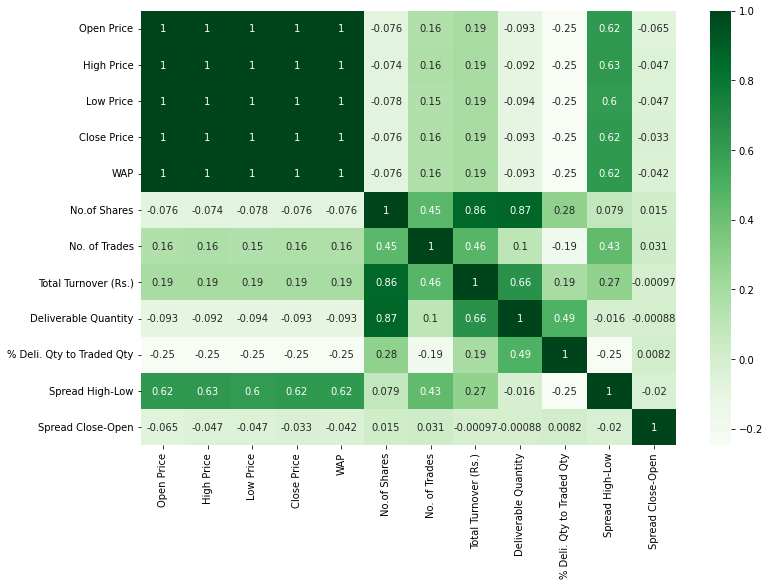

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linecolor='blue',cmap='Greens')

Weighted Average Price , Open , High and Low Prices has highest correlation with our Target column i.e. with Close Price. So , we are going to use only these four columns for better accuracy and predictions .

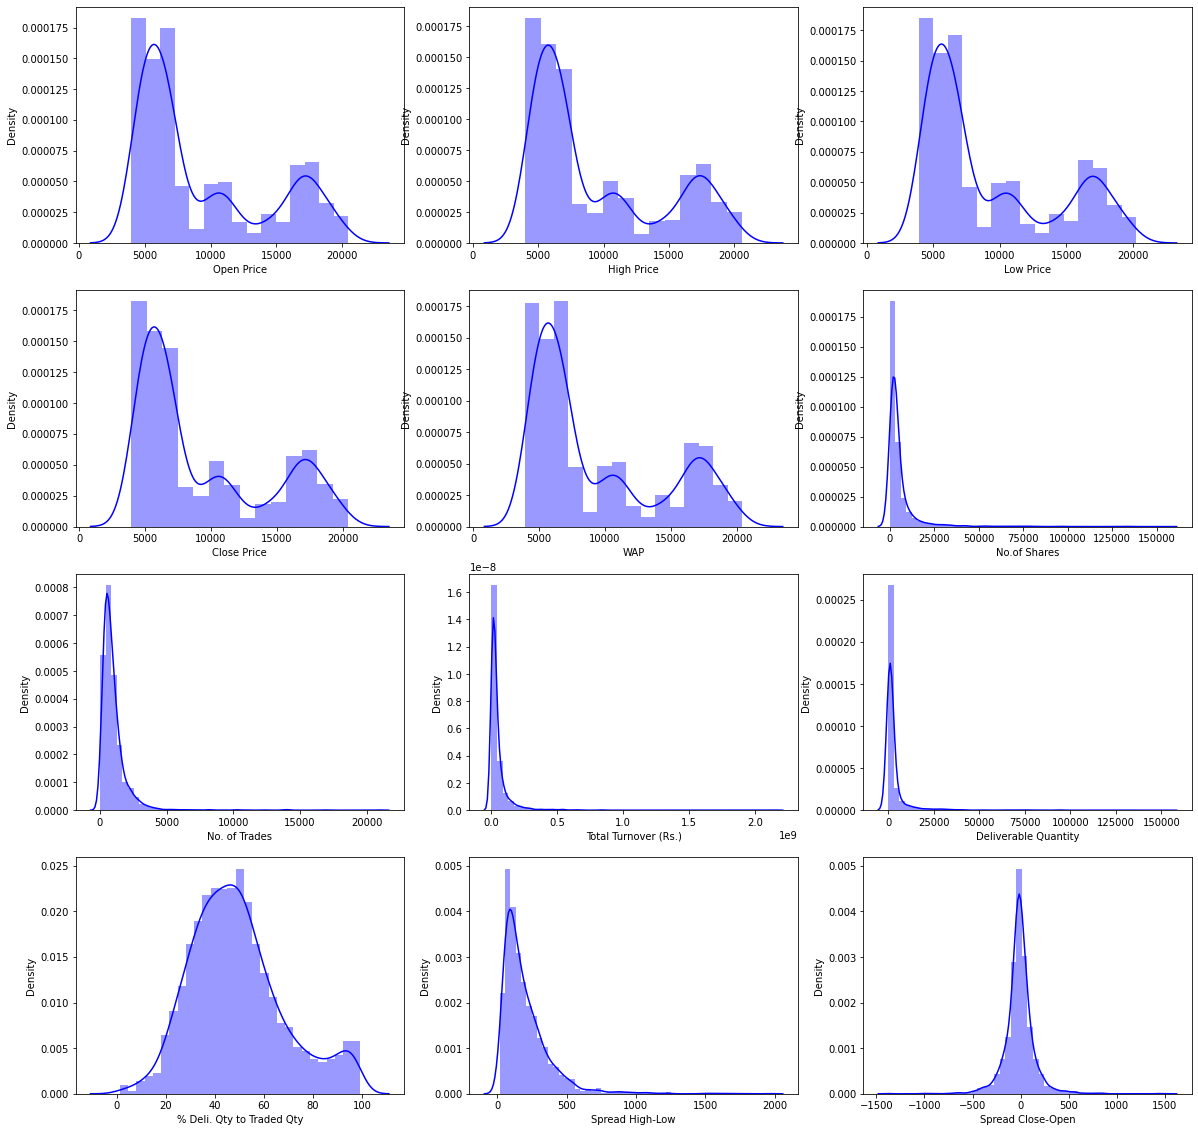

In [63]:
#drawing distribution charts
col=df.columns
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in col:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[column],color='blue');
        plt.xlabel(column)  
    plotnumber += 1

**Applying the Multiple Regression**

In [64]:

#seperating input and output columns
x=df.drop(['Close Price'],axis=1)
x

,Open Price,High Price,Low Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,18150.00,18572.95,17772.90,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,18100.10,18415.00,18017.15,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,18470.05,18718.00,17845.60,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18294.50,18684.50,18294.50,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,18371.20,18549.30,18248.25,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...
2548,4114.00,4160.00,4076.00,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,4118.00,4126.90,4080.00,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4100.00,4125.00,4081.40,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,4061.00,4110.10,4060.10,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


In [65]:
y=df.iloc[:,3]
y

0       18205.80
1       18313.70
2       17943.15
3       18549.85
4       18343.90
          ...   
2548     4143.25
2549     4101.85
2550     4120.60
2551     4095.35
2552     4070.35
Name: Close Price, Length: 2553, dtype: float64

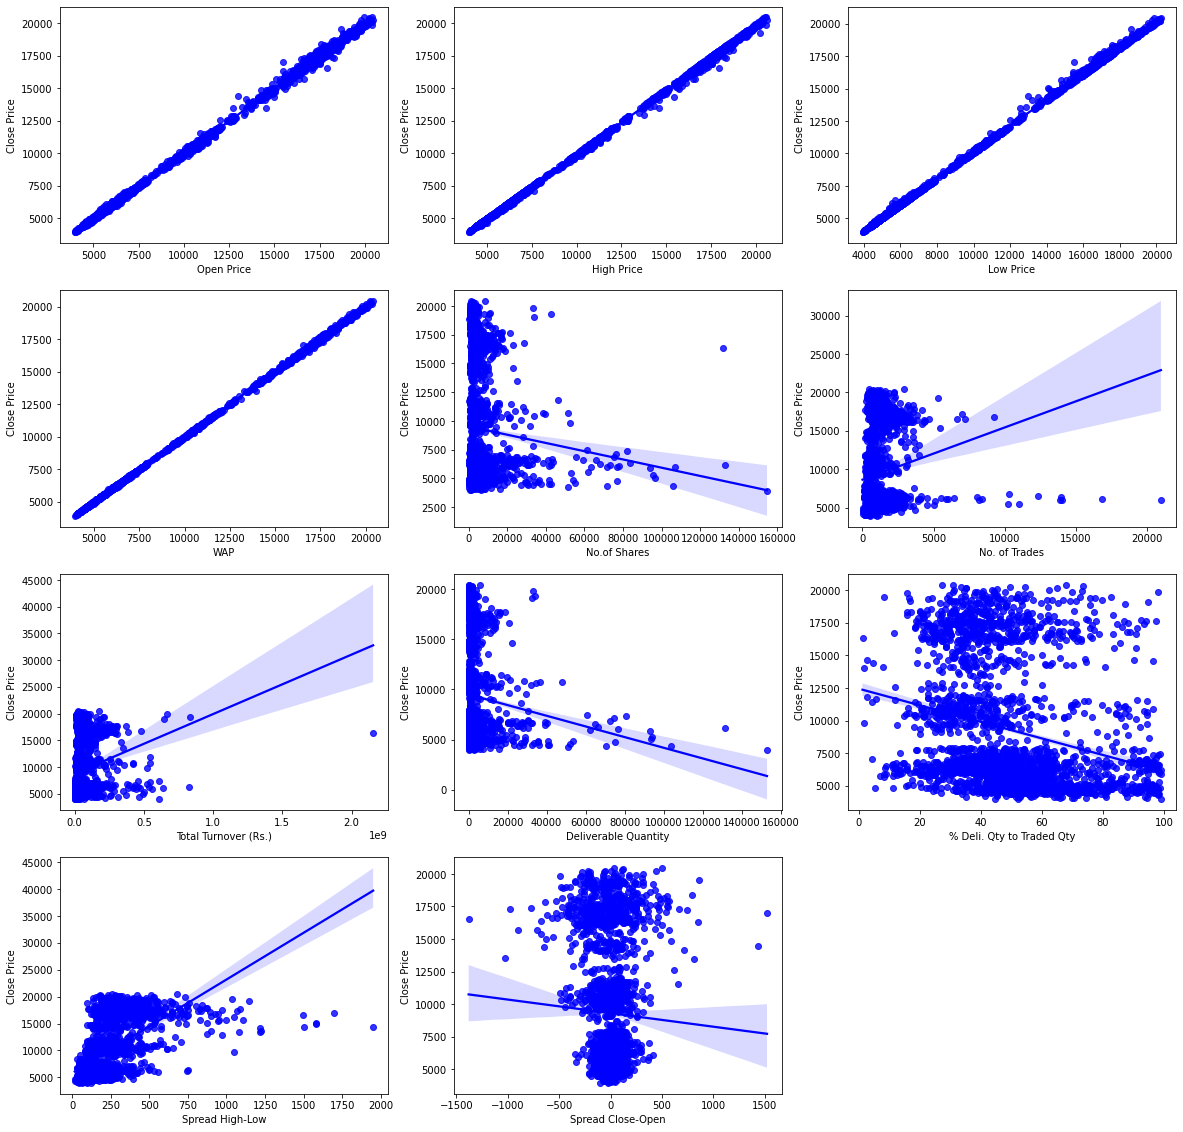

In [66]:
#drawing regression plot with the output column
colx=x.columns
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in colx:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.regplot(x=df[column],y=y,color='blue');
        plt.xlabel(column)    
    plotnumber += 1

In [67]:
#converting data to training data and testing data
from sklearn.model_selection import train_test_split
#splitting 70% of the data to training data and 30% of data to testing data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [68]:
#checking the split
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1787, 11) (766, 11) (1787,) (766,)


In [69]:
#model creation
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [70]:
#generation y_pred from x_test
y_pred=reg.predict(X_test)
y_pred.shape

(766,)

In [71]:
#c - y intercept
print("y intercept",reg.intercept_)

y intercept 2.1827872842550278e-11


In [72]:
#m - slope/ coefficence
print("slope/ coefficence",reg.coef_)

slope/ coefficence [ 1.00000000e+00 -3.44110790e-12  3.44496092e-12 -2.45064708e-15
  1.42180764e-16 -4.56535570e-17 -2.49027686e-19  2.73939420e-17
  7.38906153e-16  3.44334501e-12  1.00000000e+00]


**COMPARING ACTUAL AND PREDICTED VALUES**

In [73]:
result=pd.DataFrame({"actual_value":y_test,"predicted_value":y_pred})
result

,actual_value,predicted_value
1949,4812.95,4812.95
637,13945.10,13945.10
2150,5101.50,5101.50
393,16098.90,16098.90
1023,7850.55,7850.55
...,...,...
1755,7397.90,7397.90
642,12699.45,12699.45
1301,5883.05,5883.05
311,17872.25,17872.25


**Performace Measures**

In [74]:
#importng Evaluation marics
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
#MAE,MAPE,accuracy
print("mean_absolute_error is",mean_absolute_error(y_test,y_pred))
print("error percentage is",mean_absolute_percentage_error(y_test,y_pred))
print("accuracy is",1-mean_absolute_percentage_error(y_test,y_pred))

mean_absolute_error is 1.3739187913270808e-11
error percentage is 1.980149001750679e-15
accuracy is 0.999999999999998


In [75]:
#MSE, RMSE
print("mean_squared_error is",mean_squared_error(y_test,y_pred))
print("root mean squared error is: ", np.sqrt(mean_squared_error(y_test,y_pred)))

mean_squared_error is 4.292206182624743e-22
root mean squared error is:  2.0717640267715682e-11


In [76]:
#R2 score
print("r2_score is",r2_score(y_test,y_pred))

r2_score is 1.0


**Applying Simple Linear Regression**

In [77]:
X=df[['WAP']]
y=df['Close Price']

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [79]:
#Best Fit Line
lr.coef_

array([1.00045917])

In [80]:
lr.intercept_

-7.890221724750518

Text(0, 0.5, 'Close Price')

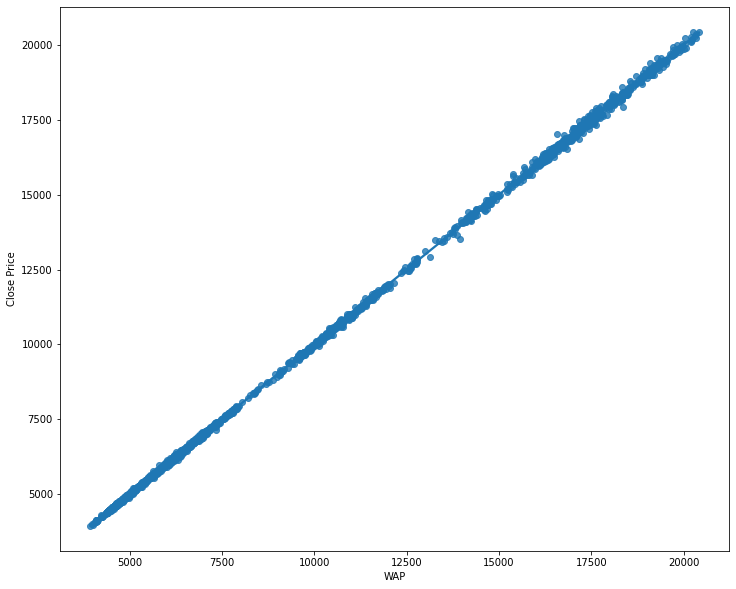

In [81]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('WAP')
plt.ylabel("Close Price")

In [82]:
y_pred = lr.predict(X_test)
y_pred

array([17111.87845809, 19360.94650643,  7042.59623153,  6278.20670576,
        4502.13062765, 17299.34990026, 17524.72333255,  4772.52078178,
        4561.90432034, 12712.71781561,  5015.76755153,  4594.44428135,
       18390.77600378,  7875.0249473 ,  9153.3031024 ,  6101.94635138,
        7902.81686575,  7035.11655662, 16566.11619743, 16329.25454604,
       19132.37178488,  5174.4779966 ,  6713.88690452,  9879.59305374,
        4047.77648805,  4903.87359543,  6988.97997274, 17725.14966974,
       16712.32557029,  9871.50053574, 20208.37581941, 14843.0609684 ,
        6015.03767808,  4637.71468555,  6606.09053681,  6768.15323622,
       15314.56864517,  9786.90329843,  5106.72997397, 14496.74406198,
       17259.89536037, 11139.79890265,  4568.61415316,  5568.00175964,
        8776.90698482, 17065.14293136,  6303.44439688, 16811.68839318,
        4578.50810463, 11033.37749418, 14011.57062333,  4452.13311369,
       16572.28876458,  6515.1074027 ,  4702.28571596, 17678.643542  ,
      


**COMPARING ACTUAL AND PREDICTED VALUES**

In [83]:
result=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_pred})
result

,Actual_value,Predicted_value
249,17086.25,17111.878458
63,19328.80,19360.946506
1770,7045.10,7042.596232
1835,6317.25,6278.206706
2428,4509.75,4502.130628
...,...,...
478,16288.65,16368.388952
889,10341.50,10419.638570
2062,5043.20,5039.600519
1506,5199.60,5096.897822


**Performance Measure**

In [84]:
#importng Evaluation marics
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
#MAE,MAPE,accuracy
print("mean_absolute_error is",mean_absolute_error(y_test,y_pred))
print("error percentage is",mean_absolute_percentage_error(y_test,y_pred))
print("accuracy is",1-mean_absolute_percentage_error(y_test,y_pred))

mean_absolute_error is 39.03609544874366
error percentage is 0.004106306747474836
accuracy is 0.9958936932525252


In [85]:
#MSE, RMSE
print("mean_squared_error is",mean_squared_error(y_test,y_pred))
print("root mean squared error is: ", np.sqrt(mean_squared_error(y_test,y_pred)))

mean_squared_error is 3821.993512241226
root mean squared error is:  61.822273593270786


In [86]:
#R2 score
print("r2_score is",r2_score(y_test,y_pred))

r2_score is 0.9998365410513401


Conclusion

1) For Simple Linear Regression - After Applying Simple Linear Regression we got 99% accuracy for both training as well as testing set . The R score was = 0.99 and MSE = 3821.99

2) Multiple Linear Regression. Multiple Regression also gave us 99% accuracy and 1 R score and 4.292206182624743e-22 as the MSE

We can Conclude that both the algorithms are perfect for predicting the Close Price.